# HR Analytics-EDA


In [2]:
import pandas as pd
from plotnine import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Python_codes\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
data = pd.read_csv('Recruitment_Data.csv')

In [4]:
data.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online


In [5]:
# Checking the shape of the data
print(data.shape)

(446, 4)


In [6]:
# Checking the data types of the columns
print(data.dtypes)

attrition               int64
performance_rating      int64
sales_quota_pct       float64
recruiting_source      object
dtype: object


In [7]:
# Checking for missing values
print(data.isnull().sum())


attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64


In [8]:
# Checking for duplicates
print(data.duplicated().sum())

0


In [9]:
# Summary statistics for numeric columns
print(data.describe())

        attrition  performance_rating  sales_quota_pct
count  446.000000          446.000000       446.000000
mean     0.213004            2.894619         1.082607
std      0.409891            0.683755         0.710042
min      0.000000            1.000000        -0.710827
25%      0.000000            2.000000         0.584444
50%      0.000000            3.000000         1.070143
75%      0.000000            3.000000         1.532488
max      1.000000            5.000000         3.666740


# Data Visulaisations

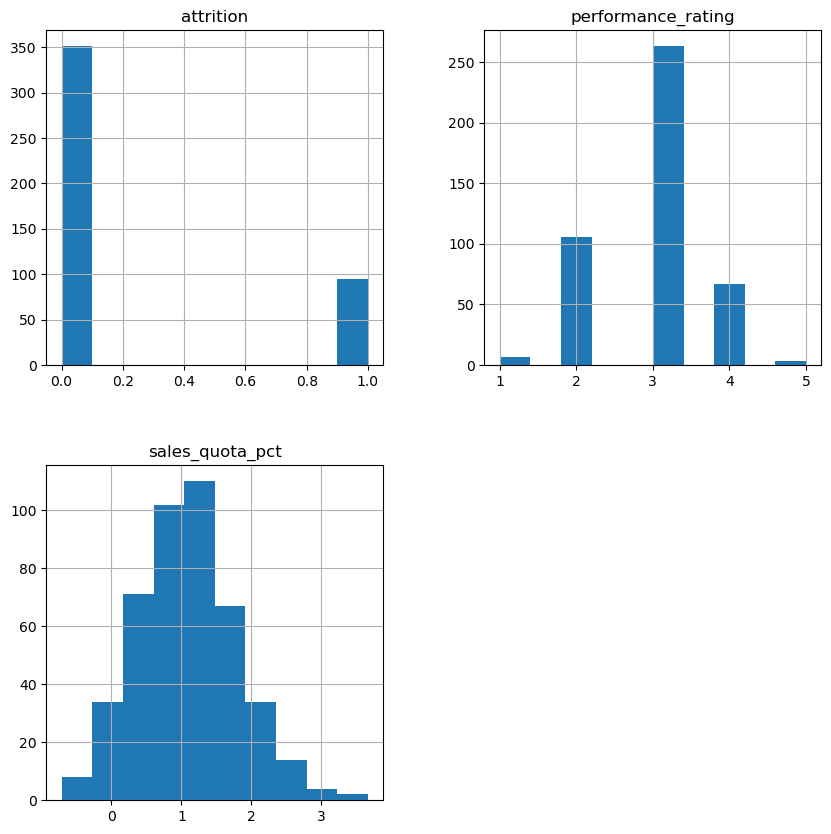

In [10]:
# Visualizing the distribution of numerical columns
data.hist(figsize=(10,10))
plt.show()

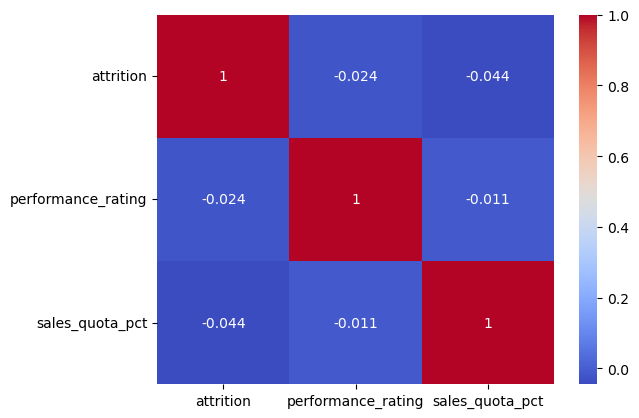

In [12]:
# Visualizing the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

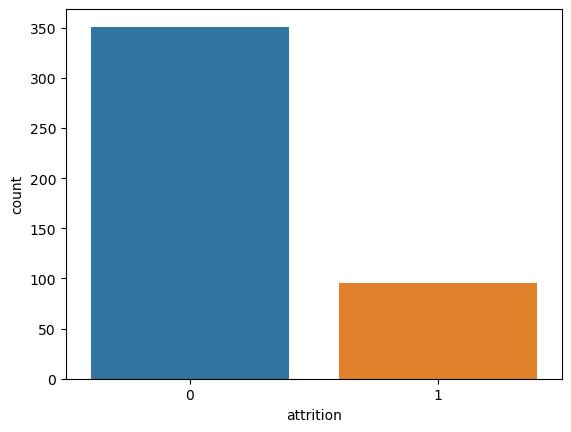

In [13]:
# Visualizing the count of categorical columns
sns.countplot(x='attrition', data=data)
plt.show()

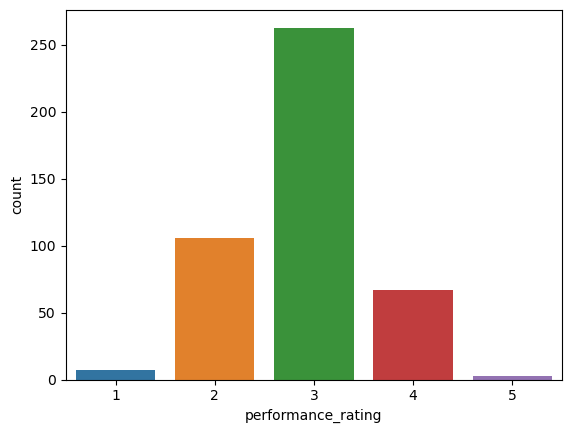

In [14]:
sns.countplot(x='performance_rating', data=data)
plt.show()

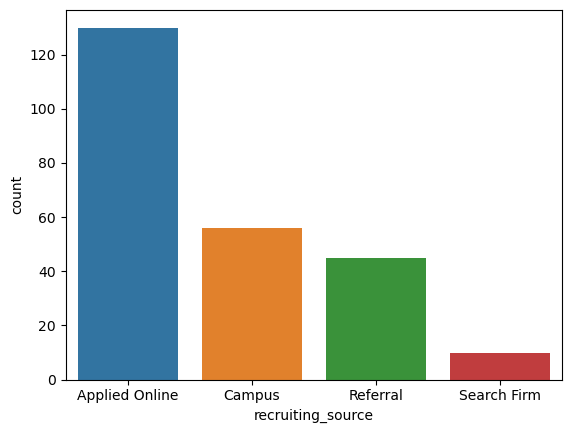

In [15]:
sns.countplot(x='recruiting_source', data=data)
plt.show()

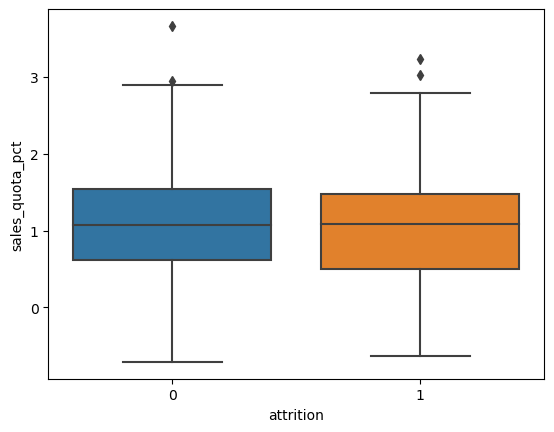

In [16]:
# Visualizing the relationship between numeric and categorical columns
sns.boxplot(x='attrition', y='sales_quota_pct', data=data)
plt.show()

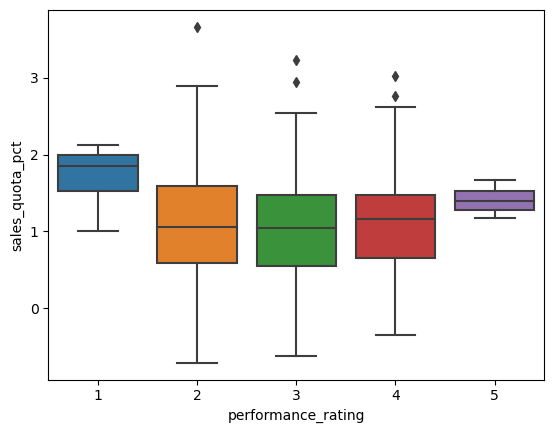

In [17]:
sns.boxplot(x='performance_rating', y='sales_quota_pct', data=data)
plt.show()

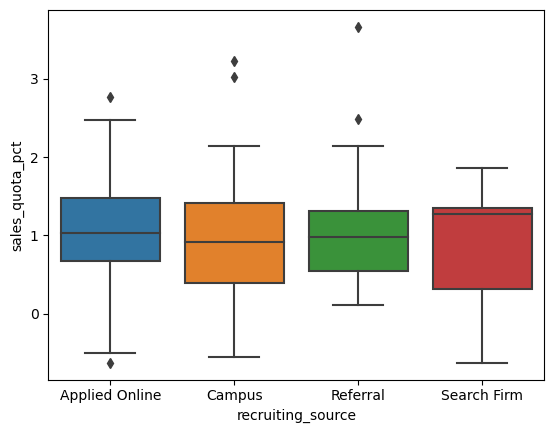

In [18]:
sns.boxplot(x='recruiting_source', y='sales_quota_pct', data=data)
plt.show()

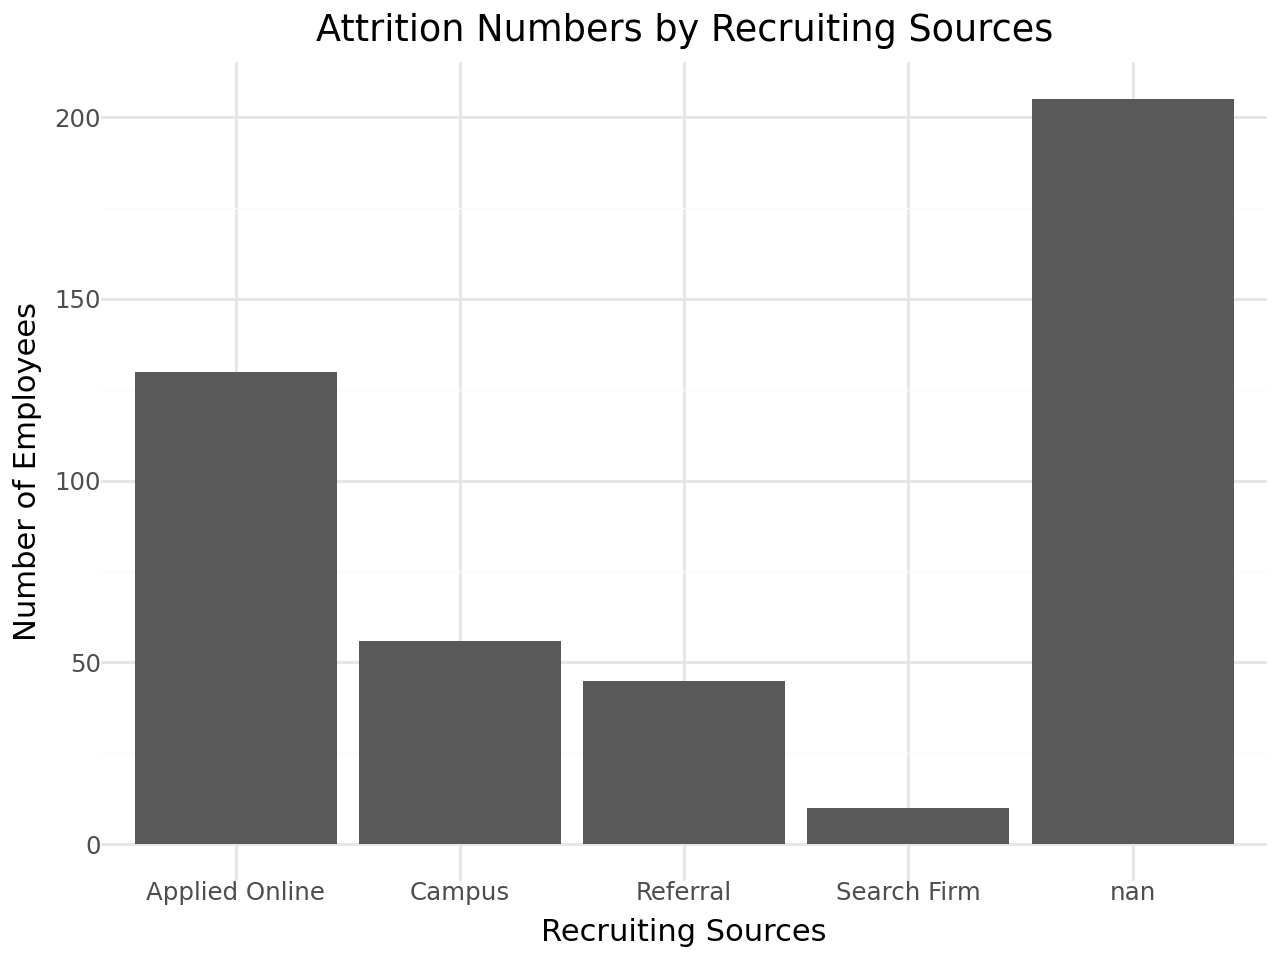

In [19]:
# plot a chart ggplot in python that illustrates attrition numbers by the recruiting sources
ggplot(data, aes(x='recruiting_source', fill='attrition')) + \
    geom_bar(position='dodge') + \
    labs(title="Attrition Numbers by Recruiting Sources", x="Recruiting Sources", y="Number of Employees") + \
    scale_fill_manual(values=["#4C72B0", "#C44E52"]) + \
    theme_minimal()

In [20]:
# printout the average sales numbers grouped by recruiting source
avg_sales_by_source = data.groupby('recruiting_source')['sales_quota_pct'].mean()
avg_sales_by_source 

recruiting_source
Applied Online    1.058590
Campus            0.908035
Referral          1.023198
Search Firm       0.886960
Name: sales_quota_pct, dtype: float64

In [21]:
# printout the average attrition numbers grouped by recruiting source
average_attrition = data.groupby('recruiting_source')['attrition'].mean()
average_attrition

recruiting_source
Applied Online    0.246154
Campus            0.285714
Referral          0.333333
Search Firm       0.500000
Name: attrition, dtype: float64

# After grouping by recruiting source we can see that minimum attrition is done by applied online category.

C:\Users\Pratim\AppData\Local\Temp\ipykernel_3012\2030138948.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



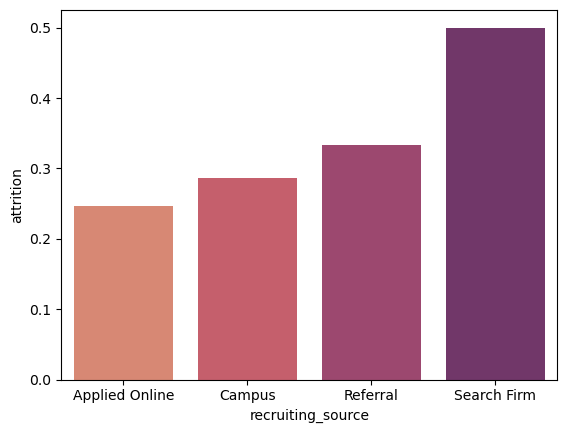

In [5]:
#Printing the graph of Attrition Number grouped by Recruiting Source
sns.barplot(data=data, x='recruiting_source', y='attrition',ci=None, palette='flare')
plt.show()

C:\Users\Pratim\AppData\Local\Temp\ipykernel_3012\4208358163.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



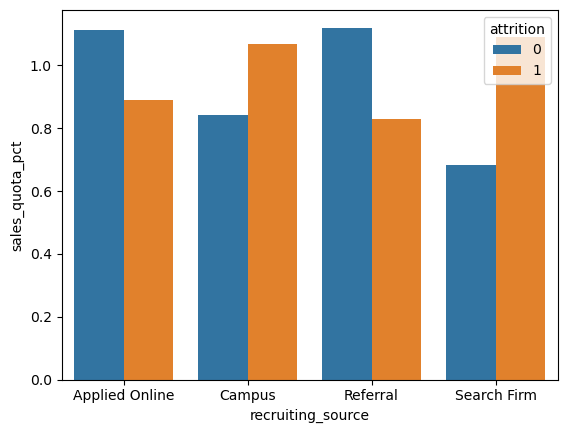

In [6]:
#bar plot to see recruiting sources that have high Sales numbers and low Attrition numbers
sns.barplot(data=data, x='recruiting_source', y='sales_quota_pct',hue="attrition",ci=None)
plt.show()

# After looking the graph we can see that applied online and referral recruiting sources have high Sales numbers and low Attrition numbers.

In [9]:
#dividing the dataset according to attrition number 0
attrition0 = data[data["attrition"]==0]
attrition0.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
1,0,3,2.394173,NaN
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
7,0,2,1.006524,Referral
8,0,3,1.519917,Campus


In [10]:
#average sales by attrition 0
#calculating the average sales percentage for each recruiting source in attrition 0
avg_sales_attrition0 = attrition0.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales_attrition0

recruiting_source
Applied Online    1.113109
Campus            0.843527
Referral          1.120629
Search Firm       0.684434
Name: sales_quota_pct, dtype: float64

C:\Users\Pratim\AppData\Local\Temp\ipykernel_3012\2687434713.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



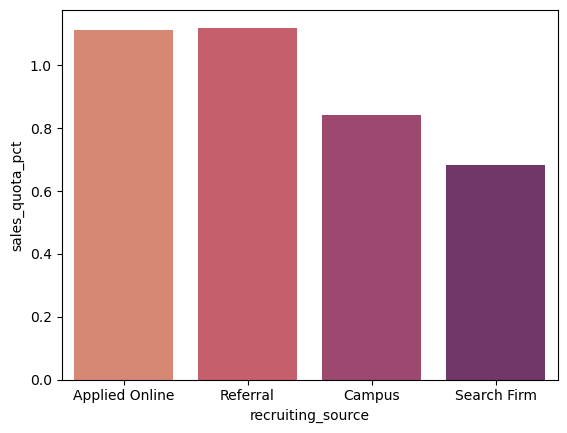

In [11]:
#average sales for each recruiting source in the attrition 0
sns.barplot(data=attrition0, x='recruiting_source', y='sales_quota_pct',ci=None,palette='flare')
plt.show()

# Applied online and referral in recruiting source have the lowest attrition and highest number sales

In [12]:
#dividing the dataset according to attrition number 1
attrition1 = data[data["attrition"]==1]
attrition1.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
2,1,2,0.497530,Campus
5,1,3,0.548123,Referral
6,1,3,0.794213,Applied Online
20,1,3,0.294166,NaN


In [13]:
#average sales in the attrition 1
avg_sales_attrition1 = attrition1.groupby("recruiting_source")["sales_quota_pct"].mean()
avg_sales_attrition1

recruiting_source
Applied Online    0.891626
Campus            1.069306
Referral          0.828336
Search Firm       1.089486
Name: sales_quota_pct, dtype: float64

C:\Users\Pratim\AppData\Local\Temp\ipykernel_3012\2381499418.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



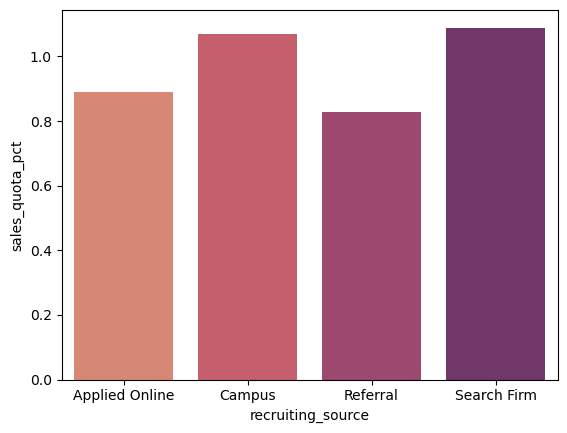

In [14]:
#average sales for each recruiting source in the attrition 1
sns.barplot(data=attrition1, x='recruiting_source', y='sales_quota_pct',ci=None,palette='flare')
plt.show()

# Search firm and campus in recruiting source are higher within high attrition rate and high sales number